In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import data

The data contains three years (2015-2017) worth of customer orders, including the following four columns:
- index
- customer_email
- net_revenue
- year

In [2]:
orders_df = pd.read_csv ('data/casestudy.csv', header=0, names=['index', 'customer_email', 'net_revenue', 'year'])

print(f'Data size (n_rows, n_columns): {orders_df.shape}')
display(orders_df.head()) 

Data size (n_rows, n_columns): (685927, 4)


,index,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [3]:
# Summary of data
orders_df.info()

# Decscriptive statistics of data
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


,index,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


In [4]:
# Check if customer emails are unique per year
orders_df.groupby('year')['customer_email'].agg(['size', 'count']) 

# Since the number of rows ('size') equals the number of unique 'customer_email' values (count) for each year, 
# customer emails are unique per year

,size,count
year,,
2015,231294,231294
2016,204646,204646
2017,249987,249987


# Data analysis
For each year, the following will be calulated:
- Total revenue for the current year (existing customer revenue + new customer revenue)
- New customer revenue (new customers are customers that were not present in previous year only).
- Existing customer growth (revenue of existing customers for current year – revenue of existing customers from the previous year).
- Average revenue lost from attrition. Here we assume that the net revenue per lost customer is equal to the average net revenue of the current year.
- Existing customer revenue current year.
- Existing customer revenue prior year.
- Total customers current year.
- Total customers previous year.
- New customers.
- Lost customers.

In [5]:
years_ls = [2015, 2016, 2017]

existing_rev_ls = []
for idx, year in enumerate(years_ls):
    
    print(f'Year: {year}')
    
    # store orders of previous year (if applicable) and current year in a separate dataframe
    if idx == 0:
        orders_current_df = orders_df[orders_df['year'] == year]
    else:
        orders_previous_df = orders_df[orders_df['year'] == years_ls[idx-1]]
        orders_current_df = orders_df[orders_df['year'] == year]

    # total revenue of current year
    total_revenue = round(orders_current_df['net_revenue'].sum(), 2)
    print(f'Total revenue: {total_revenue}')

    ### New customer revenue
    if idx == 0:
        print('New customer revenue: N/A')
    else:
        new_customers_df = orders_current_df[~orders_current_df['customer_email'].isin(orders_previous_df['customer_email'])]
        print(f'New customer revenue: {round(new_customers_df["net_revenue"].sum(), 2)}')
        
    ### Existing customer growth
    if idx == 0:
        existing_rev_ls.append(total_revenue)
        print('Existing customer revenue growth: N/A')
    else:
        common_df = orders_previous_df.merge(orders_current_df, on='customer_email', how='inner')
        existing_current_rev = common_df['net_revenue_y'].sum()
        existing_rev_ls.append(existing_current_rev)
        existing_previous_rev = existing_rev_ls[idx-1]
        
        growth = existing_current_rev - existing_previous_rev
        growth_rate = growth/ existing_previous_rev
        print(f'Existing customer revenue growth: {round(growth, 2)} (rate={round(growth_rate*100, 2)}%)')
    
    ### Revenue lost from attrition
    if idx == 0:
        print('Revenue lost from attrition: N/A')
    else:
        lost_customers_df = orders_previous_df[~orders_previous_df['customer_email'].isin(orders_current_df['customer_email'])]
        ave_revenue_current = orders_current_df['net_revenue'].mean()
        lost_revenue = ave_revenue_current * lost_customers_df.shape[0]
        print(f'Average revenue lost from attrition: {round(lost_revenue, 2)}')
        
    ### Existing customer revenue current year
    if idx == 0: 
        print(f'Existing customer revenue current year: {total_revenue}')
    else:
        print(f'Existing customer revenue current year: {existing_current_rev}')
    
    ### Existing customer revenue prior year
    if idx == 0:
        print('Existing customer revenue prior year: N/A')
    else:
        print(f'Existing customer revenue prior year: {existing_previous_rev}')

    ### Total customers current year
    print(f'Total customers current year: {orders_current_df["customer_email"].nunique()}')

    ### Total customers previous year
    if idx == 0:
        print('Total customers previous year: N/A')
    else:
        print(f'Total customers previous year: {orders_previous_df["customer_email"].nunique()}')

    ### New Customers
    if idx == 0:
        print('Number of new customers: N/A')
    else:
        print(f'Number of new customers: {new_customers_df["customer_email"].nunique()}')

    ### Lost Customers
    if idx == 0:
        print('Number of lost customers: N/A')
    else:
        lost_customers_df = orders_previous_df[~orders_previous_df['customer_email'].isin(orders_current_df['customer_email'])]
        print(f'Number of lost customers: {lost_customers_df["customer_email"].nunique()}')
    
    print()

Year: 2015
Total revenue: 29036749.19
New customer revenue: N/A
Existing customer revenue growth: N/A
Revenue lost from attrition: N/A
Existing customer revenue current year: 29036749.19
Existing customer revenue prior year: N/A
Total customers current year: 231294
Total customers previous year: N/A
Number of new customers: N/A
Number of lost customers: N/A

Year: 2016
Total revenue: 25730943.59
New customer revenue: 18245491.01
Existing customer revenue growth: -21551296.61 (rate=-74.22%)
Average revenue lost from attrition: 21589771.23
Existing customer revenue current year: 7485452.58
Existing customer revenue prior year: 29036749.19
Total customers current year: 204646
Total customers previous year: 231294
Number of new customers: 145062
Number of lost customers: 171710

Year: 2017
Total revenue: 31417495.03
New customer revenue: 28776235.04
Existing customer revenue growth: -4844192.59 (rate=-64.71%)
Average revenue lost from attrition: 23085142.07
Existing customer revenue curren

### Visualizations

In [6]:
def millions_formatter(x, pos):
    return f'{x / 1000000}'

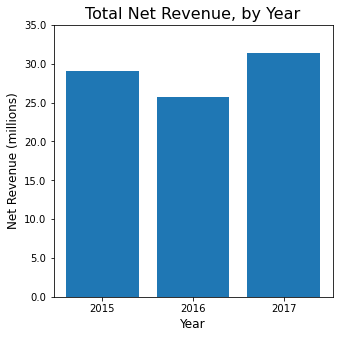

In [7]:
# Barplot of total net revenue, by year
df = pd.DataFrame(orders_df.groupby('year')['net_revenue'].sum()).reset_index()
y_pos = np.arange(len(df['year']))

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(y_pos, df['net_revenue'])
plt.xticks(y_pos, df['year'])
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylim(0, 35000000)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Revenue (millions)", fontsize=12)
plt.title("Total Net Revenue, by Year", fontsize=16)
plt.show()

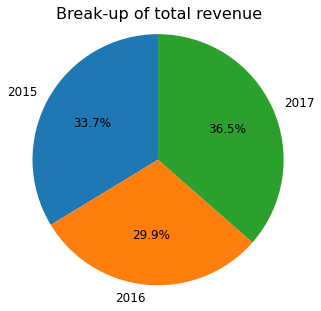

In [8]:
# Pie chart showing breap-up of total revenue
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df['net_revenue'], labels=[2015, 2016, 2017], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Break-up of total revenue",  fontsize=16)
plt.show()

# Key findings
According to the results and plots, the total revenue was the lowest in 2016 (\~\\$27.5M), and highest in 2017 (\~\\$31.4M). The drop in revenue from 2015 to 2016, followed by a rise in revenue from 2016 to 2017, reflects the decrease and increase of customers for those years. The negative existing customer revenue growth in 2016 and 2017 indicates that existing customers decreased their spending or left. Although 2017 experienced a negative existing customer revenue growth, the total revenue increased from 2016 to 2017 due to the new customer spending behavior. 